In [147]:
import pandas as pd
import numpy as np
veri=pd.read_csv("titanic.csv")

In [148]:
veri.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [149]:
veri.shape

(1310, 14)

In [150]:
veri.dtypes #burda objeleri eğer eğitmede kullanıcaksak int ya da float a çevirmemiz lazım

pclass       float64
survived     float64
name          object
sex           object
age          float64
sibsp        float64
parch        float64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [151]:
import seaborn as sns

<Axes: xlabel='survived', ylabel='count'>

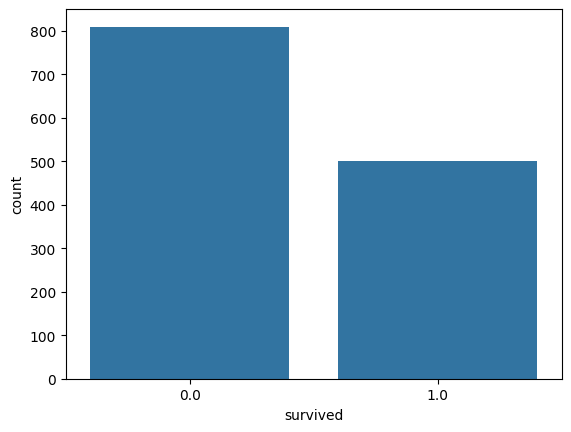

In [152]:
sns.countplot(x="survived",data=veri)  #survived column'unu görselleştirdik

<Axes: xlabel='survived', ylabel='count'>

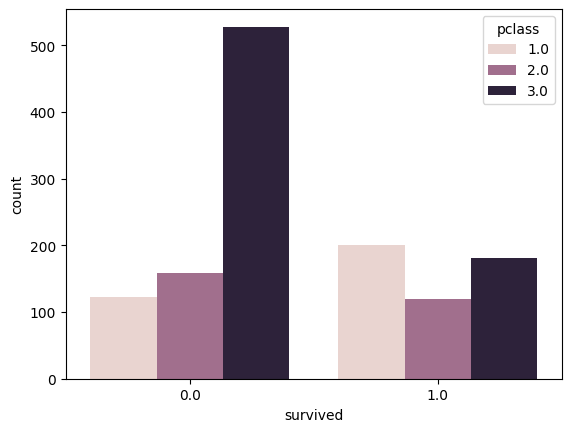

In [153]:
sns.countplot(x="survived",hue="pclass", data=veri)  #survived column'unu her bir pclass çeşidi için görselleştirdik

<Axes: xlabel='survived', ylabel='count'>

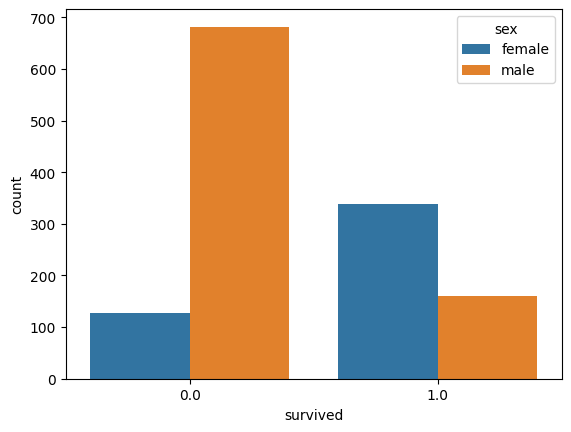

In [154]:
sns.countplot(x="survived",hue="sex", data=veri)  #survived column'unu her bir sex çeşidi için görselleştirdik

<Axes: ylabel='Frequency'>

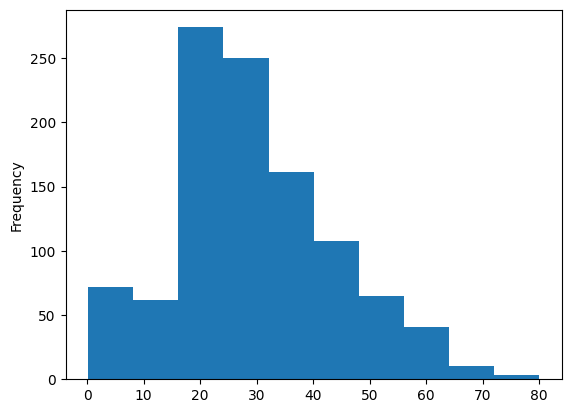

In [155]:
veri["age"].plot.hist()  #yaş histogramı

<Axes: ylabel='Frequency'>

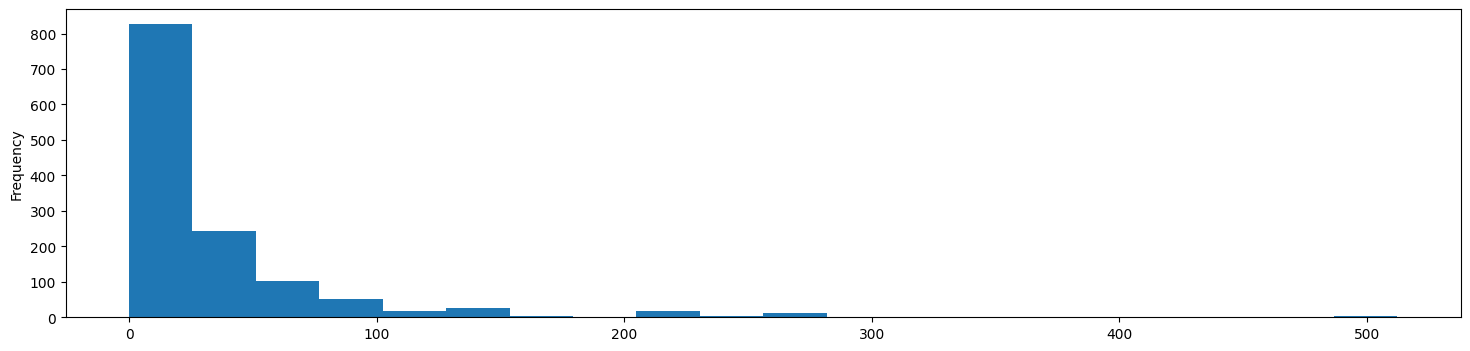

In [156]:
veri["fare"].plot.hist(bins=20,figsize=(18,4))  #bilet fiyatı histogramı

<Axes: xlabel='sibsp', ylabel='count'>

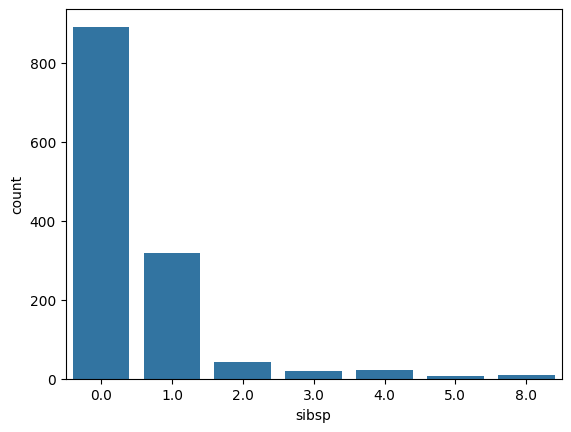

In [157]:
sns.countplot(x="sibsp", data=veri)

In [158]:
veri.isnull()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,False,False,False,False,True,False,False,False,False,True,False,True,True,True
1306,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1307,False,False,False,False,False,False,False,False,False,True,False,True,True,True
1308,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [159]:
veri.isnull().sum() #hepsinde kaçar tane nan var ona bakıyoruz

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

<Axes: >

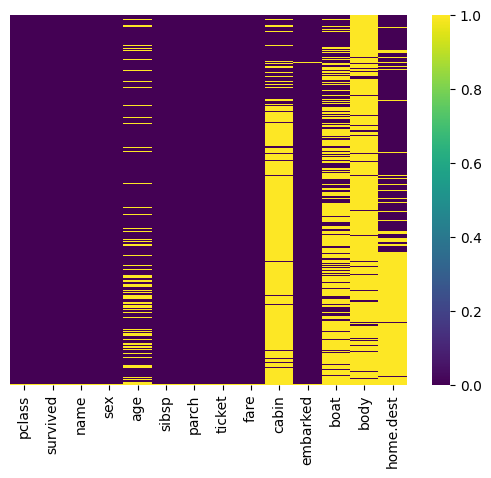

In [160]:
sns.heatmap(veri.isnull(),yticklabels=False,cmap="viridis")  #boşlukların anlaşılması için görselleştirme yapıyoruz

In [161]:
veri.drop(["cabin","boat","body","home.dest"],axis=1,inplace=True)   #inplace = true ile değişiklikler verisetinde kalıcı olarak silinicek

In [162]:
veri.isnull().sum() #hepsinde kaçar tane nan var ona bakıyoruz

pclass        1
survived      1
name          1
sex           1
age         264
sibsp         1
parch         1
ticket        1
fare          2
embarked      3
dtype: int64

In [163]:
veri.dropna(inplace=True)

In [164]:
veri.isnull().sum() #hepsinde kaçar tane nan var ona bakıyoruz, yapılan işlemlerden sonra eksik veri kalmadı

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

In [165]:
veri.dtypes

pclass      float64
survived    float64
name         object
sex          object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
embarked     object
dtype: object

In [166]:
sex

,male
0,False
1,True
2,False
3,True
4,False
...,...
1301,True
1304,False
1306,True
1307,True


In [167]:
sex=pd.get_dummies(veri["sex"],drop_first=True)  #first drop mantığı şu misal 2 özellik var. her bir kişi için 1. özellik 0 ise diğeri zorunlu olarak 1 dir. bu yüzden 2 özelliği de tabloda göstermeye gerek yoktur. düşürülür

In [168]:
sex.head() #1 erkek 2 kadın

,male
0,False
1,True
2,False
3,True
4,False


In [169]:
veri.embarked.value_counts()

embarked
S    781
C    212
Q     50
Name: count, dtype: int64

In [170]:
embarked=pd.get_dummies(veri["embarked"],drop_first=True)

In [171]:
pclass=pd.get_dummies(veri["pclass"],drop_first=True)

In [172]:
veri.drop(["sex","embarked","pclass"],axis=1,inplace=True)

In [173]:
veri=pd.concat([veri,sex,embarked,pclass],axis=1)

In [174]:
veri.dtypes #abjecy olarak duran nema ve ticket verilerini modele dahil etmicez


survived    float64
name         object
age         float64
sibsp       float64
parch       float64
ticket       object
fare        float64
male           bool
Q              bool
S              bool
2.0            bool
3.0            bool
dtype: object

In [175]:
veri.drop(["name","ticket"],axis=1,inplace=True)

In [176]:
bool_columns = veri.select_dtypes(include=['bool']).columns
print("Boolean sütunlar:", bool_columns)

for col in bool_columns:
    veri[col] = veri[col].astype('float64')    #hepsini float yaptık

Boolean sütunlar: Index(['male', 'Q', 'S', 2.0, 3.0], dtype='object')


In [177]:
veri.head(5)  #şu an her şey istediğimiz gibi

,survived,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,1.0,29.0000,0.0,0.0,211.3375,0.0,0.0,1.0,0.0,0.0
1,1.0,0.9167,1.0,2.0,151.5500,1.0,0.0,1.0,0.0,0.0
2,0.0,2.0000,1.0,2.0,151.5500,0.0,0.0,1.0,0.0,0.0
3,0.0,30.0000,1.0,2.0,151.5500,1.0,0.0,1.0,0.0,0.0
4,0.0,25.0000,1.0,2.0,151.5500,0.0,0.0,1.0,0.0,0.0


In [178]:
x=veri.drop("survived",axis=1)
y=veri["survived"]

In [179]:
x.head(5)  #veriseti parçalandı şimdi test ve train ayrışmasına geçebiliriz

,age,sibsp,parch,fare,male,Q,S,2.0,3.0
0,29.0000,0.0,0.0,211.3375,0.0,0.0,1.0,0.0,0.0
1,0.9167,1.0,2.0,151.5500,1.0,0.0,1.0,0.0,0.0
2,2.0000,1.0,2.0,151.5500,0.0,0.0,1.0,0.0,0.0
3,30.0000,1.0,2.0,151.5500,1.0,0.0,1.0,0.0,0.0
4,25.0000,1.0,2.0,151.5500,0.0,0.0,1.0,0.0,0.0


In [180]:
from sklearn.model_selection import train_test_split

In [181]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,
                                              random_state=100)   # burda test ve train oranını verdik yüzde 75 i train içinken kalan yüzde 25 test için kullanılıcak

In [182]:
x_train.head(5)

,age,sibsp,parch,fare,male,Q,S,2.0,3.0
112,28.0,3.0,2.0,263.0000,0.0,0.0,1.0,0.0,0.0
498,32.0,0.0,0.0,13.5000,1.0,0.0,1.0,1.0,0.0
907,20.0,1.0,0.0,9.8250,0.0,0.0,1.0,0.0,1.0
10,47.0,1.0,0.0,227.5250,1.0,0.0,0.0,0.0,0.0
465,23.0,0.0,0.0,13.7917,0.0,0.0,0.0,1.0,0.0


In [183]:
y_train.head(5)  #analizimizde bir yolcu hayatta kaldı mı öldü mü bunu öğrenmek istiyoruz. dolayısıyla hedef değişken 2 li katagoriden oluştuğu için 2 li lojistik regression kullanıcaz

112    1.0
498    0.0
907    0.0
10     0.0
465    1.0
Name: survived, dtype: float64

In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
lg_model=LogisticRegression(max_iter=1000)


In [196]:
x_train.columns = x_train.columns.astype(str)  #nedense float olarak kabul etmedi ben de str çevirdim :///

In [203]:
x_test.columns = x_test.columns.astype(str)

In [204]:
lg_model.fit(x_train,y_train) #ilk çalıştırdığımıda hata aldım çünkü linear regression içinde default iteration number 100 bunu 100 e çıakrtarak hhatadan kurtuluyoruz

LogisticRegression(max_iter=1000)

In [205]:
lg_model.score(x_test,y_test)

0.7701149425287356

In [206]:
lg_model.score(x_train,y_train) #modelde overfitting var çünkü trainde daha iyi bi puan aldı

0.8069053708439897

In [222]:
lg_model=LogisticRegression(C=0.1,max_iter=1000)#burda öğrenme katsayısını "C" değiştiriyoruz

In [223]:
lg_model.fit(x_train,y_train) #bidaha deniyoruz

LogisticRegression(C=0.1, max_iter=1000)

In [224]:
lg_model.score(x_test,y_test)

0.7816091954022989

In [225]:
lg_model.score(x_train,y_train) #şimdi daha yakınlar over fittingi azalttık

0.7953964194373402

In [228]:
from sklearn.metrics import confusion_matrix

In [229]:
tahmin =lg_model.predict(x_train)

In [231]:
confusion_matrix(y_train,tahmin)   #traindeki başarısını ölçüyoruz 415 tane true positive var 207 tane true negative var 58 değer aslında pozitifken yanlış tahminle positive bulunmuş 102 değer de tam tersi

array([[415,  58],
       [102, 207]])

In [232]:
tahmin =lg_model.predict(x_test)

In [233]:
confusion_matrix(y_test,tahmin)

array([[124,  21],
       [ 36,  80]])

In [245]:
x_train.head(1)

,age,sibsp,parch,fare,male,Q,S,2.0,3.0
112,28.0,3.0,2.0,263.0,0.0,0.0,1.0,0.0,0.0


In [250]:
yeni_veri=np.array(x_train.head(1))

In [254]:
lg_model.predict(yeni_veri)

C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1.])

In [255]:
y_train.head(1)  #örnek olarak bunu denedim ve evet 1. kişiyi doğru tahmmin etmiş

112    1.0
Name: survived, dtype: float64

In [256]:
lg_model.coef_  #bu da her bir özelliğin ne kadar modeli etkilediği

array([[-0.03162905, -0.31951604,  0.06693542,  0.00648179, -1.80719988,
        -0.41933193, -0.37357884, -0.18060041, -1.02516275]])

In [261]:
yeni_veri_2=np.array([[30,1,2,25464.1,0,0,1,1,1]])#erkek ve ucuz bilet almışken öldü kadın yapıp bilet fıyatını arttırdım ve yaşadı....

In [262]:
lg_model.predict(yeni_veri_2)

C:\Users\asus\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1.])